# Capstone Project
*Consumer Sentiment Insights and Trend Analysis*

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm #normal distribution
from scipy.stats import pearsonr #correlation coefficient
import time

### Context

The dataset consists of 1,060 Amazon reviews for various portable Bluetooth speakers from several high-end audio brands. The data was collected from Amazon.com through the OxyLabs API. There are 11 columns, including 2 numerical columns:

1. **review_id:** Unique identifier for each review
2. **product_id:** Unique ASIN representing a specific speaker model
3. **title:** Title of the review
4. **author:** Name or username of the review author
5. **rating:** User rating, on a scale from 1 to 5
6. **content:** Text of the review
7. **timestamp:** Date and time when the review was posted
8. **profile_id:** Unique identifier for the author's profile
9. **is_verified:** Indicates whether the reviewer's account is verified
10. **helpful_count:** Number of user upvotes, indicating the review's helpfulness or reliability
11. **product_attributes:** Features of the product, including color, size, and style

In [ ]:
# Load dataset
df = pd.read_csv("merged_csv_data.csv")

# Show top 5 rows
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2LQYVEK3JWJW2,B099TJGJ91,5.0 out of 5 stars Great clear and powerful sp...,LilliesofTruth,5,"The sound quality is absolutely exceptional, d...","Reviewed in the United States July 31, 2024",AGER2OA4FJUBXTG4D47RSLLBPTMA,True,2,Color: White Smoke
1,R2TB41OYEQ665X,B099TJGJ91,5.0 out of 5 stars Simply great.,Jake,5,I have thoroughly enjoyed my entire ownership ...,"Reviewed in the United States May 4, 2024",AHZBIFMKWWZHILYEIYOSP4AIA37Q,True,224,Color: Black
2,R2Y3WBHYS3U0M4,B099TJGJ91,5.0 out of 5 stars A premium speaker in a stur...,Reviewer MHM 3-5,5,I bought this speaker because I wanted a way t...,"Reviewed in the United States July 2, 2024",AH5F7QHDE5VKRAMBN43A5WPU4ADQ,True,100,Color: Black
3,R22BP3UXW8MVME,B099TJGJ91,5.0 out of 5 stars sound quality,Max,5,I'm absolutely thrilled with this speaker! The...,"Reviewed in the United States July 23, 2024",AHBACXI2N3R5HP7LWWUEPXQB3XYQ,True,0,Color: Stone Blue
4,RQALUUYJSIT6A,B099TJGJ91,5.0 out of 5 stars Portable Speaker,Jose,5,This is by far the best portable speaker I hav...,"Reviewed in the United States July 28, 2024",AEA76CNGB75445PR4RJJZF3BHM6A,True,1,Color: Green


In [ ]:
# Get a preview about dataset
df.info()       #check shape, data types, null count
df.describe()   #summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1060 non-null   object
 1   product_id          1060 non-null   object
 2   title               1060 non-null   object
 3   author              1060 non-null   object
 4   rating              1060 non-null   int64 
 5   content             1060 non-null   object
 6   timestamp           1060 non-null   object
 7   profile_id          1055 non-null   object
 8   is_verified         1060 non-null   bool  
 9   helpful_count       1060 non-null   int64 
 10  product_attributes  1060 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 84.0+ KB


,rating,helpful_count
count,1060.000000,1060.000000
mean,4.580189,3.775472
std,0.886465,18.897131
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,283.000000


## Data Cleaning

In this part, I will clean the dataset by identifying and handling missing values, corrupt values, outliers, duplicates, correcting data types, and performing other preprocessing steps.

In [ ]:
# Copy the original dataset
df1 = df.copy()

In [ ]:
print(df1.columns)
print(df1.dtypes)

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')
review_id             object
product_id            object
title                 object
author                object
rating                 int64
content               object
timestamp             object
profile_id            object
is_verified             bool
helpful_count          int64
product_attributes    object
dtype: object


In [ ]:
# Drop irrelevant columns
df1.drop(df1.columns[[3,7,8]], axis=1, inplace=True)
df1.head()

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes
0,R2LQYVEK3JWJW2,B099TJGJ91,5.0 out of 5 stars Great clear and powerful sp...,5,"The sound quality is absolutely exceptional, d...","Reviewed in the United States July 31, 2024",2,Color: White Smoke
1,R2TB41OYEQ665X,B099TJGJ91,5.0 out of 5 stars Simply great.,5,I have thoroughly enjoyed my entire ownership ...,"Reviewed in the United States May 4, 2024",224,Color: Black
2,R2Y3WBHYS3U0M4,B099TJGJ91,5.0 out of 5 stars A premium speaker in a stur...,5,I bought this speaker because I wanted a way t...,"Reviewed in the United States July 2, 2024",100,Color: Black
3,R22BP3UXW8MVME,B099TJGJ91,5.0 out of 5 stars sound quality,5,I'm absolutely thrilled with this speaker! The...,"Reviewed in the United States July 23, 2024",0,Color: Stone Blue
4,RQALUUYJSIT6A,B099TJGJ91,5.0 out of 5 stars Portable Speaker,5,This is by far the best portable speaker I hav...,"Reviewed in the United States July 28, 2024",1,Color: Green


In [ ]:
# Check for duplicate data
df1[df1.duplicated()]

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes


There is no duplicate data in the dataset.

In [ ]:
# Check for missing values
df1.isnull().sum()

review_id             0
product_id            0
title                 0
rating                0
content               0
timestamp             0
helpful_count         0
product_attributes    0
dtype: int64

There are no missing values in the dataset. Before removing the irrelevant columns, there were 5 missing values in the 'profile_id' column. However, the entire column was dropped.

In [ ]:
# Identify numerical outliers using interquartile range (IQR)
Q1 = df1['rating'].quantile(0.25)
Q3 = df1['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df1[(df1['rating'] < lower_bound) | (df1['rating'] > upper_bound)]
print(outliers_df)

#outlier_df.groupby(['product_id'])['rating'].agg(pd.Series.mode)
#outlier_df.groupby(['product_id'])['rating'].value_counts()

           review_id  product_id  \
6     R3N5UYTNS8D2V6  B099TJGJ91   
9     R2TT1UU35P8I2W  B099TJGJ91   
18    R1NJVFBBSQHMJQ  B099TJGJ91   
24    R1RC8B8SAHAJGQ  B099TJGJ91   
35    R1N3FUL4C0AV4T  B099TJGJ91   
...              ...         ...   
1032  R31FPPEOE54HHH  B0D4SX9RC6   
1049  R3KPQBYL6X3PQX  B0D4SX9RC6   
1051  R16YQMK6DBJQBM  B0D4SX9RC6   
1054  R2AZVHS8KVEN85  B0D4SX9RC6   
1059   RGSIQ5EFETRO2  B0D4SX9RC6   

                                                  title  rating  \
6     4.0 out of 5 stars Small speaker, big sound, t...       4   
9     4.0 out of 5 stars Surprisingly loud, no EQ co...       4   
18    4.0 out of 5 stars Decent sound regardless of ...       4   
24                   4.0 out of 5 stars Bose girl here…       4   
35       4.0 out of 5 stars 6always loved Bose products       4   
...                                                 ...     ...   
1032           4.0 out of 5 stars Not bad for the price       4   
1049  3.0 out of 5 stars Sounds

In [ ]:
# Check for non-numeric values
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')
invalid_values = df['rating'].isnull().sum()
print(f"Number of invalid numeric values: {invalid_values}")

Number of invalid numeric values: 0


In [ ]:
# Check for corrupt categorical values
for col in df1.columns:
    print(df1[col].unique())


['R2LQYVEK3JWJW2' 'R2TB41OYEQ665X' 'R2Y3WBHYS3U0M4' ... 'RDNZF4I13GKT4'
 'R2ZF60HWQ8L0NI' 'RGSIQ5EFETRO2']
['B099TJGJ91' 'B09GJVTRNZ' 'B08Z1C8NM9' 'B07DD3VXRZ' 'B09XXW54QG'
 'B08VL5S148' 'B0CXL4FQBK' 'B07P39MLKH' 'B08X4YMTPM' 'B016QXV2QK'
 'B0D4SX9RC6']
['5.0 out of 5 stars Great clear and powerful speaker'
 '5.0 out of 5 stars Simply great.'
 '5.0 out of 5 stars A premium speaker in a sturdy package.'
 '5.0 out of 5 stars sound quality' '5.0 out of 5 stars Portable Speaker'
 '5.0 out of 5 stars Sound quality'
 '4.0 out of 5 stars Small speaker, big sound, travel friendly'
 '5.0 out of 5 stars Gets loud enough for its size. (Or a bit too loud for neighbors)'
 '5.0 out of 5 stars 5 Million Stars!! ⭐⭐⭐⭐⭐'
 '4.0 out of 5 stars Surprisingly loud, no EQ controls, few caveats'
 '5.0 out of 5 stars Good sound, solid unit, but CONNECTION difficulties to know'
 '5.0 out of 5 stars Bose quality'
 '5.0 out of 5 stars BOSE for the WIN!!!'
 '5.0 out of 5 stars Best small portable bose speaker ever!

Most of the reviews contain extra text and non-alphanumeric characters that reduce readability. I will remove those characters.

In [ ]:
df1['content'] = df1['content'].str.replace(r'^\d+\.\d+ out of 5 stars\s*', '', regex=True).str.replace(r'\W+', ' ', regex=True).str.strip()
df1['content']

0       The sound quality is absolutely exceptional de...
1       I have thoroughly enjoyed my entire ownership ...
2       I bought this speaker because I wanted a way t...
3       I m absolutely thrilled with this speaker The ...
4       This is by far the best portable speaker I hav...
                              ...                        
1055    Simple to use very simple to pair within the A...
1056    Upgraded from an Anker Soundcore 2 Considered ...
1057    It s compact and efficient with the lithium ba...
1058    Feels so solid of a device highly recommend it...
1059    The Goods As a Master s student looking for th...
Name: content, Length: 1060, dtype: object

In [ ]:
df1[df1['title']=='']

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes


In [ ]:
df1[df1['content']=='']

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes
879,R1I5WG0M6GEFI1,B08X4YMTPM,5.0 out of 5 stars 😀,5,,"Reviewed in the United States August 2, 2024",0,Color: Black
942,RP8GOOLI0HEU0,B016QXV2QK,5.0 out of 5 stars 💯,5,,"Reviewed in the United States June 4, 2023",0,Color: Black


Some of the reviews have no text/are blank. I will remove them.

In [ ]:
remove_index = df1[df1['content']==''].index
df1.drop(remove_index, inplace=True)

Some of the titles and content are in languages other than English. I will identify which languages are present.

In [ ]:
from google.cloud import translate_v2 as translate

# Initialize the Google Cloud Translate API client
translate_client = translate.Client()

# Function to detect the language using Google Cloud Translate API
def detect_language(text):
    if isinstance(text, str):  # Ensure text is a string
        result = translate_client.detect_language(text)
        return result['language']  # Returns language code (e.g., 'en', 'fr')
    return 'unknown'


# Apply the detect_language function to create 'language' column
df1['language'] = df1['content'].apply(detect_language)
df1['language']

0       en
1       en
2       en
3       en
4       en
        ..
1055    en
1056    en
1057    en
1058    en
1059    en
Name: language, Length: 1058, dtype: object

In [ ]:
# Check all languages present
df1['language'].unique()

array(['en', 'es', 'pt'], dtype=object)

In [ ]:
df1[df1['language'] == 'es'].head()

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes,language
93,REU2RV24G9TUG,B099TJGJ91,5.0 out of 5 stars Amazing!!!,5,Suena super bien Todo tipo de musica suenan co...,"Reviewed in the United States July 31, 2024",0,Color: Stone Blue,es
120,R14MA1UDS9JNYZ,B09GJVTRNZ,5.0 out of 5 stars Buen Producto,5,Vengo de usar un parlante genérico y se nota l...,"Reviewed in the United States July 31, 2024",0,Color: GreyStyle: Flip 6,es
137,R3K6OSO8ET1RNO,B09GJVTRNZ,5.0 out of 5 stars Gran sonido y bajos por su ...,5,Tiene una gran fidelidad en el sonido y el sis...,"Reviewed in the United States July 20, 2024",0,Color: WhiteStyle: Flip 6,es
158,RU7JYUOND9975,B09GJVTRNZ,5.0 out of 5 stars Excelente bocina,5,Llegó en excelente estado y funciona al 100,"Reviewed in the United States August 6, 2024",0,Color: TealStyle: Flip 6,es
172,R1BOWJDQB1DEB9,B09GJVTRNZ,5.0 out of 5 stars Bicina,5,Muy buena y potente,"Reviewed in the United States August 3, 2024",0,Color: BlueStyle: Flip 6,es


In [ ]:
df1[df1['language'] == 'pt']

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes,language
243,R211XMJV6LQ7CY,B08Z1C8NM9,5.0 out of 5 stars Excelente,5,Excelente,"Reviewed in the United States April 26, 2024",0,Size: SingleColor: White,pt
470,R2V510U905A56Y,B09XXW54QG,5.0 out of 5 stars Excelente,5,Excelente,"Reviewed in the United States June 13, 2024",0,Color: Black & BrassStyle: Emberton II,pt
526,R3N7YK3WIAW46O,B08VL5S148,5.0 out of 5 stars Excelente,5,Todo,"Reviewed in the United States July 16, 2024",0,Color: Black,pt
1021,R35DQABEPYTVK6,B0D4SX9RC6,5.0 out of 5 stars Me gusta mucho,5,Excelente,"Reviewed in the United States July 14, 2024",0,Color: Champagne GoldStyle: PillPattern: Witho...,pt


There were a few languages detected, including English, Spanish, and Portuguese. The reviews that were detected as Portuguese seemed to be in Spanish. It is possible that those reviews were too short to be correctly identified. Regardless, I will remove all of the non-English reviews.

In [ ]:
df1.drop(df1.loc[df1['language'] != 'en'].index, inplace=True) #remove non-english reviews

# Reset the index
df1.reset_index(drop=True, inplace=True)

print(f"Number of non-English reviews removed = {len(df)-len(df1)}") #print number of non-english reviews removed
print(f"Total reviews in dataset: {len(df1)}")

Number of non-English reviews removed = 52
Total reviews in dataset: 1008


I converted the 'timestamp' column from object to datetime type.

In [ ]:
# Remove the text before the date
df1['timestamp'] = df1['timestamp'].str.replace(r'^Reviewed in .+? (\w+ \d{1,2}, \d{4})$', r'\1', regex=True)

# Convert text to datetime objects
#df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%B %d, %Y')
df1['timestamp'] = df1['timestamp'].astype('datetime64[ns]')
df1['timestamp']

0      2024-07-31
1      2024-05-04
2      2024-07-02
3      2024-07-23
4      2024-07-28
          ...    
1003   2024-07-02
1004   2024-08-03
1005   2024-08-03
1006   2024-07-18
1007   2024-07-31
Name: timestamp, Length: 1008, dtype: datetime64[ns]

In [ ]:
# View all unique product attributes
df1['product_attributes'].unique()

array(['Color: White Smoke', 'Color: Black', 'Color: Stone Blue',
       'Color: Green', 'Color: Chilled Lilac',
       'Color: BlackStyle: Flip 6', 'Color: TealStyle: Flip 6',
       'Color: CamoStyle: Flip 6', 'Color: PinkStyle: Flip 6',
       'Color: BlueStyle: Flip 6', 'Color: GreyStyle: Flip 6',
       'Color: WhiteStyle: Flip 6', 'Color: RedStyle: Flip 6',
       'Color: GreenStyle: Flip 6', 'Size: SingleColor: White',
       'Size: SingleColor: Black', 'Size: 2-PackColor: Black',
       'Size: 2-PackColor: White', 'Color: Night BlackPattern: Speaker',
       'Color: Lagoon BluePattern: Speaker',
       'Color: Sunset RedPattern: Speaker',
       'Color: Ultraviolet PurplePattern: Speaker',
       'Color: Ultraviolet PurplePattern: Speaker + Charging Dock',
       'Color: BlackStyle: Emberton',
       'Color: Black & BrassStyle: Emberton II',
       'Color: CreamStyle: Emberton II', 'Color: Silver',
       'Color: Off White', 'Color: Orange', 'Color: Forest Gray',
       'Color:

For the Marshall speaker, the reviews include both the Emberton and Emberton II styles. I only want reviews for the newer Emberton II style. So I will remove all reviews for the older version.

In [ ]:
marshall_product_id = 'B09XXW54QG'
marshall_df = df1[df1['product_id'] == marshall_product_id]
marshall_ii_df = marshall_df[marshall_df['product_attributes'].str.contains("Style: Emberton II")]

# Filter rows that are not for Marshall speakers
other_ids_df = df1[df1['product_id'] != marshall_product_id]

# Combine the filtered rows with rest of the dataset
df1 = pd.concat([marshall_ii_df, other_ids_df])

# Reset the index
df1.reset_index(drop=True, inplace=True)

print(f"Number of Emberton reviews removed: {len(marshall_df) - len(marshall_ii_df)}")
print(f"Total reviews in dataset: {len(df1)}")

Number of Emberton reviews removed: 17
Total reviews in dataset: 991


Then, I created a column for the name of each product.

In [ ]:
asins = {
    'B099TJGJ91': 'Bose SoundLink Flex',
    'B09GJVTRNZ': 'JBL Flip 6',
    'B08Z1C8NM9': 'Sonos Roam',
    'B07DD3VXRZ': 'Ultimate Ears Boom 3',
    'B09XXW54QG': 'Marshall Emberton II',
    'B08VL5S148': 'Bose SoundLink Revolve+ (Series II)',
    'B0CXL4FQBK': 'Sony ULT Field 1',
    'B07P39MLKH': 'Soundcore Motion+',
    'B08X4YMTPM': 'JBL Charge 5',
    'B016QXV2QK': 'Beats Pill Plus',
    'B0D4SX9RC6': 'Beats Pill'
}

# Create a new column for product names
df1['product_name'] = df1['product_id'].apply(lambda asin: asins.get(asin, 'unknown product'))

print(df1[['product_id', 'product_name']])

     product_id          product_name
0    B09XXW54QG  Marshall Emberton II
1    B09XXW54QG  Marshall Emberton II
2    B09XXW54QG  Marshall Emberton II
3    B09XXW54QG  Marshall Emberton II
4    B09XXW54QG  Marshall Emberton II
..          ...                   ...
986  B0D4SX9RC6            Beats Pill
987  B0D4SX9RC6            Beats Pill
988  B0D4SX9RC6            Beats Pill
989  B0D4SX9RC6            Beats Pill
990  B0D4SX9RC6            Beats Pill

[991 rows x 2 columns]


Then, I created a column for the price of each product.

In [ ]:
prices = {
    'Bose SoundLink Flex': 149.00,
    'JBL Flip 6': 129.95,
    'Sonos Roam': 179,
    'Ultimate Ears Boom 3': 149.99,
    'Marshall Emberton II': 169.99,
    'Bose SoundLink Revolve+ (Series II)': 329,
    'Sony ULT Field 1': 129.99,
    'Soundcore Motion+': 99.99,
    'JBL Charge 5': 179.95,
    'Beats Pill Plus': 229.95,
    'Beats Pill': 149.95
}

# Create a new column for product prices
df1['product_price'] = df1['product_name'].apply(lambda price: prices.get(price, 'unknown price'))

# Display every product and its price
#df1[['product_name', 'product_price']].groupby(by='product_name').first()
df1[['product_name', 'product_price']].value_counts()

product_name                         product_price
Beats Pill Plus                      229.95           99
Bose SoundLink Flex                  149.00           99
Soundcore Motion+                    99.99            99
Sonos Roam                           179.00           97
Ultimate Ears Boom 3                 149.99           97
JBL Flip 6                           129.95           95
Sony ULT Field 1                     129.99           95
Bose SoundLink Revolve+ (Series II)  329.00           92
JBL Charge 5                         179.95           91
Marshall Emberton II                 169.99           68
Beats Pill                           149.95           59
Name: count, dtype: int64

From the 'product_attributes' column, I created a separate 'color' column.

In [ ]:
# Extract text from 'product_attributes' column to create a color column
df1['color'] = df1['product_attributes'].str.extract(r'Color:\s*([\w\s&]+?)(?=\s*(Style|Pattern|Size|$))')[0]
df1['color']

0       Black & Brass
1               Cream
2       Black & Brass
3       Black & Brass
4               Cream
            ...      
986    Champagne Gold
987    Champagne Gold
988    Champagne Gold
989       Matte Black
990       Matte Black
Name: color, Length: 991, dtype: object

Then, I created a 'base_color' column to make data visualiztion simpler.

In [ ]:
# Create a list of unique colors across all products
unique_colors = ['Gold', 'Black', 'Red', 'White', 'Lilac', 'Green', 'Blue', 'Silver', 'Camo', 'Gray', 'Pink', 'Teal', 'Cream', 'Orange', 'Purple']

# Create a 'base_color' column to establish generic color names
df1['base_color'] = [
    'Gray' if 'Gray' in item or 'Grey' in item else
    [color for color in unique_colors if color in item][0] if any(color in item for color in unique_colors)
    else np.nan
    for item in df1['color']
]

# Display base colors and identify outliers
print(df1['base_color'].value_counts())

base_color
Black     569
White      91
Blue       83
Red        50
Gray       35
Orange     26
Silver     19
Camo       18
Pink       18
Cream      16
Green      16
Gold       16
Lilac      14
Teal       12
Purple      8
Name: count, dtype: int64


Purple, teal and lilac are the colors with the lowest frequency among all speakers. There are several factors that could be responsible:

* Season/time of year when speaker was released
* Limited product availability (may be limited edition or lower inventory)
* Social trends (minimalist, cool or metallic colors such as black, white, blue, gray, and silver tend to be more popular in general, especially for home design & many people use their speakers at home)
* Gendered preferences (bright colors are often unpopular among male consumers, whereas minimalist/cool/metallic colors are liked by all consumers; the only popular bright colors are red and orange, which are colors that male consumers may not necessarily avoid)

## EDA

In [ ]:
# Copy the cleaned dataset
df2 = df1.copy()

In [ ]:
df2.tail()

,review_id,product_id,title,rating,content,timestamp,helpful_count,product_attributes,language,product_name,product_price,color,base_color
986,R3IZVBKYX8CE4G,B0D4SX9RC6,"Excellent- Packs a punch, great addition to Ap...",5,Simple to use very simple to pair within the A...,2024-07-02,0,Color: Champagne GoldStyle: PillPattern: Witho...,en,Beats Pill,149.95,Champagne Gold,Gold
987,R72QZJ321STFM,B0D4SX9RC6,"Great sound, small form factor",5,Upgraded from an Anker Soundcore 2 Considered ...,2024-08-03,0,Color: Champagne GoldStyle: PillPattern: Witho...,en,Beats Pill,149.95,Champagne Gold,Gold
988,RDNZF4I13GKT4,B0D4SX9RC6,Satisfaction Pill,5,It s compact and efficient with the lithium ba...,2024-08-03,0,Color: Champagne GoldStyle: PillPattern: Witho...,en,Beats Pill,149.95,Champagne Gold,Gold
989,R2ZF60HWQ8L0NI,B0D4SX9RC6,Amazing speaker,5,Feels so solid of a device highly recommend it...,2024-07-18,0,Color: Matte BlackStyle: PillPattern: Without ...,en,Beats Pill,149.95,Matte Black,Black
990,RGSIQ5EFETRO2,B0D4SX9RC6,Amazing sound quality in a hefty package (w/ u...,4,The Goods As a Master s student looking for th...,2024-07-31,0,Color: Matte BlackStyle: PillPattern: Without ...,en,Beats Pill,149.95,Matte Black,Black


In [ ]:
# Get summary statistics
df2.describe()

,rating,timestamp,helpful_count,product_price
count,991.000000,991,991.000000,991.000000
mean,4.566095,2023-09-28 20:45:17.255297536,3.989909,172.624834
min,1.000000,2015-12-03 00:00:00,0.000000,99.990000
25%,5.000000,2023-12-07 12:00:00,0.000000,129.990000
50%,5.000000,2024-06-12 00:00:00,0.000000,149.990000
75%,5.000000,2024-07-20 00:00:00,2.000000,179.950000
max,5.000000,2024-08-06 00:00:00,283.000000,329.000000
std,0.908668,NaN,19.509229,60.198389


In [ ]:
# Compute other basic descriptive statistics
mode = df2['rating'].mode()
variance = df2['rating'].var()

print("For 'rating' column:")
print(f"Mode: {mode[0]}")
print(f"Variance: {variance}")

For 'rating' column:
Mode: 5
Variance: 0.8256775627108626


Across all products, the average rating is about 4.6. Helpful count is generally very low. The average price is about $172. The prices range from about $100 to $329.

### Univariate Analysis

`rating` distribution

([<matplotlib.axis.XTick at 0x30914fe90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

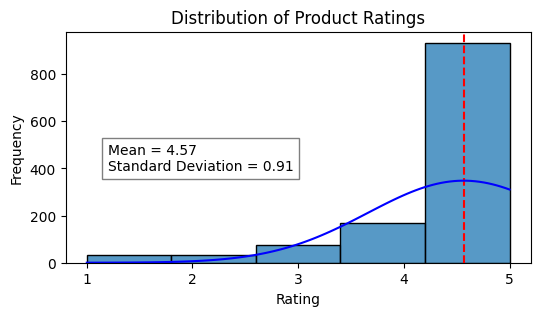

In [ ]:
# Calculate mean and standard deviation of ratings
mean = np.mean(df2['rating'])
std_dev = np.std(df2['rating'])

# Set a range of values for the normal distribution
x_values = np.linspace(df2['rating'].min(), df2['rating'].max(), 100)
normal_dist = norm.pdf(x_values, mean, std_dev)  #normal distribution curve

# Plot the histogram
plt.figure(figsize=(6,3))
sns.histplot(data=df2, x='rating', stat='frequency', bins=5) #plot histogram
plt.axvline(x=np.mean(df2['rating']), c='red', ls='--', label='mean') #draw line for mean

# Draw the normal distribution curve
plt.plot(x_values, normal_dist * len(df2['rating']) * (df2['rating'].max() - df2['rating'].min()) / 5, color='blue')

# Add text to show mean and standard deviation on the plot
plt.text(df2['rating'].min() + 0.2, max(normal_dist * len(df2['rating'])) * 0.9,
         f'Mean = {mean:.2f}\nStandard Deviation = {std_dev:.2f}',
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5])

The distribution of ratings is left-skewed. We can see that the products tend to have higher ratings, between the scores of 4 and 5.

`helpful_count` distribution

Text(0.5, 0, 'Helpful Count')

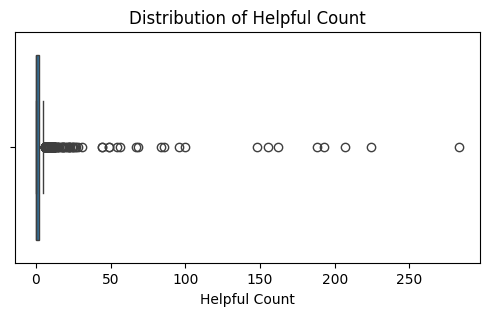

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df2, x='helpful_count')
plt.title('Distribution of Helpful Count')
plt.xlabel('Helpful Count')

`product_price` distribution

Text(0.5, 0, 'Price')

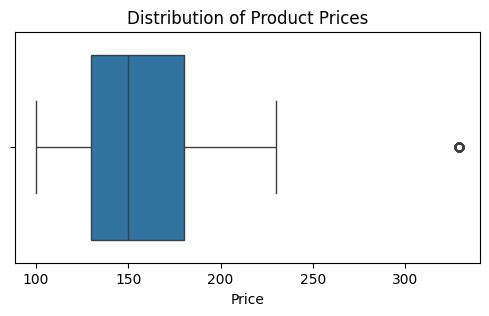

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df2, x='product_price')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')

`color` distribution

Text(0, 0.5, 'Count')

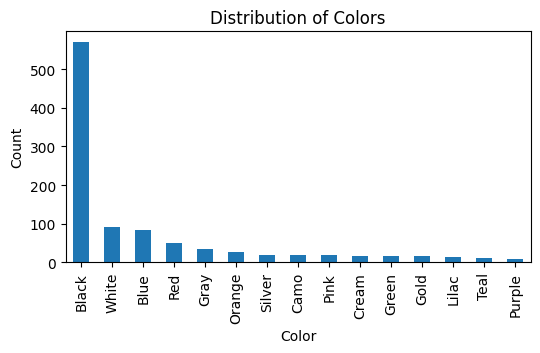

In [ ]:
plt.figure(figsize=(6,3))
df2['base_color'].value_counts().plot(kind='bar')
plt.title("Distribution of Colors")
plt.xlabel("Color")
plt.ylabel("Count")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'helpful_count'}>,
        <Axes: title={'center': 'product_price'}>]], dtype=object)

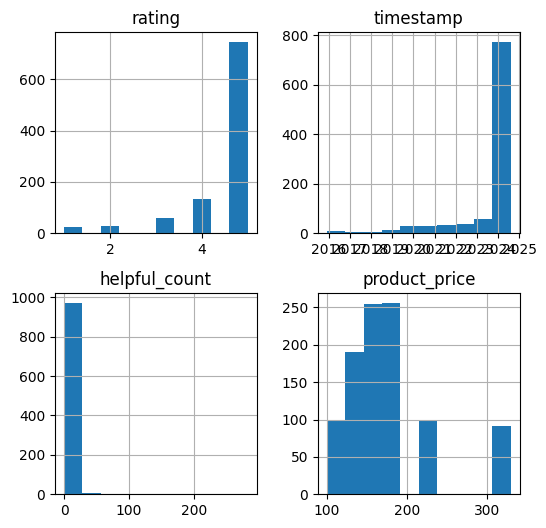

In [ ]:
df2.hist(figsize=(6,6))

### Summary

* `rating`
    * The distribution of ratings is heavily skewed towards the higher end, with most reviews being 4 or 5 stars.
    * There are very few low ratings (1 or 2 stars), indicating generally positive feedback for the products.
* `helpful_count`
    * The distribution of helpful counts is highly skewed, with most reviews having very low or zero helpful counts.
    * A few reviews have extremely high helpful counts (outliers), indicating these particular reviews were significantly more helpful to users.
* `product_price`
    * The distribution of product prices is somewhat bimodal, with a concentration around the $150-$180 range.
    * There are a few products priced significantly higher, but no extreme outliers are evident.
* `color`
    * The distribution of colors is ...

### Bivariate Analysis

`helpful_count` vs `rating`

Text(0.5, 1.0, 'Helpful Count vs Rating')

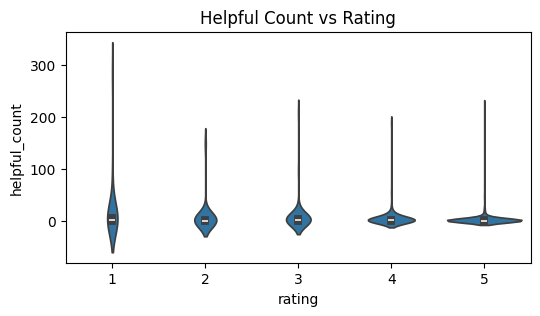

In [ ]:
plt.figure(figsize=(6,3))
sns.violinplot(data=df2, x='rating', y='helpful_count')
plt.title('Helpful Count vs Rating')

`rating` vs `timestamp`

`color` vs `timestamp`

`color` vs `rating`

([<matplotlib.axis.YTick at 0x313b5cb60>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5')])

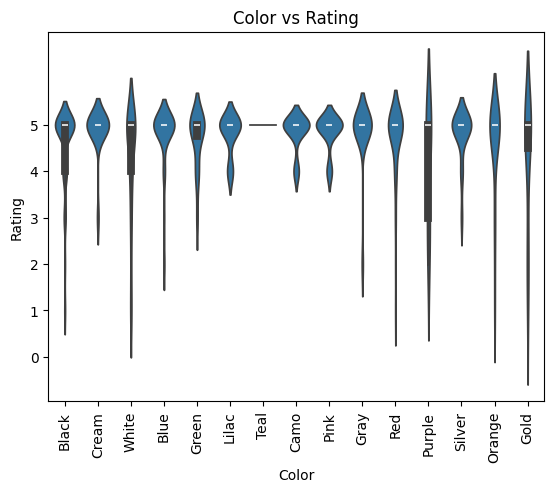

In [ ]:
sns.violinplot(x='base_color', y='rating', data=df2)
plt.title("Color vs Rating")
plt.xlabel("Color")
plt.xticks(rotation='vertical')
plt.ylabel("Rating")
plt.yticks([0,1,2,3,4,5])

### Summary

* `helpful_count` vs `rating`
    * /
* `rating` vs `timestamp`
    * /
* `color` vs `timestamp`
    * /
* `color` vs `rating`
    * /

## Correlation Analysis

In this part, I will gain a better understanding about the relationships between variables in the dataset by:
* Determining the correlation between two columns
* Calculating the covariance
* Calculating the correlation coefficient
* Visualizing correlation

In [ ]:
def calculate_correlation(df, col1, col2):
    """
    Calculate the correlation coefficient between two columns in a DataFrame.
    """
    return df[col1].corr(df[col2])

def calculate_skewness_kurtosis(df, col):
    """
    Calculate the skewness and kurtosis of a column in a DataFrame.
    """
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    return skewness, kurtosis


Correlation between 'rating' and 'time': 0.075
Skewness and kurtosis of 'rating': (9.271440911849137, 98.0314407341773)


Text(0, 0.5, 'Rating')

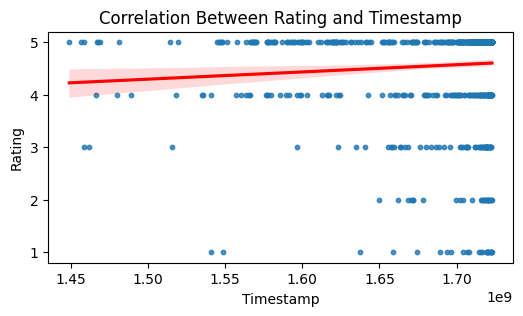

In [ ]:
# Convert 'timestamp' to numeric format
df2['time'] = pd.to_datetime(df2['timestamp']).astype(int) / 10**9  #convert to unix timestamp

# Calculate correlation coefficient
corr_rating_timestamp = df2[['rating', 'time']].corr().iloc[0, 1]
print(f"Correlation between 'rating' and 'time': {corr_rating_timestamp:.3f}")
print("Skewness and kurtosis of 'rating':", calculate_skewness_kurtosis(df2, 'helpful_count'))

# Visualize correlation
plt.figure(figsize=(6,3))
sns.regplot(x='time', y='rating', data=df2, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Correlation Between Rating and Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Rating')

In [ ]:
# Set x and y
x = df2['rating']
y = df2['time']

# Calculate covariance matrix
cov_matrix = np.cov(x,y)
print("Covariance Matrix:\n", cov_matrix)

# Extract covariance of x and y
cov_xy = cov_matrix[0, 1]
print("Covariance of x and y:", cov_xy)

# Calculate correlation coefficient using pandas
# r = x.corr(y)
# print(f"Correlation Coefficient (pandas): {r:.3f}")

# Calculate correlation coefficient using scipy
# r, p_value = pearsonr(x, y)
# print(f"Correlation: {r:.3f}")
# print(f"p-value: {p_value:.3f}")

# Calculate covariance using pandas
# cov_xy = x.cov(y)
# print("Covariance of x and y (pandas):", cov_xy)

# Calculate correlation matrix
corr_matrix = df2.corr()

# Visualize correlation matrix
plt.figure(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

## Sentiment Analysis

In this part, I will gain meaningful insights to better understand consumer preferences and opinions, and help to predict market trends.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
def sentiment_analysis_summary(df, text_col):
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
    for text in df[text_col]:
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity

        if sentiment_score > 0:
            sentiments['positive'] += 1
        elif sentiment_score < 0:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1
    return sentiments


# Display the results of sentiment analysis
sentiment_summary = sentiment_analysis_summary(df, 'content')
print("Sentiment Summary:", sentiment_summary)
print(f"Sentiment analysis shows that most reviews are {'positive' if sentiment_summary['positive'] > sentiment_summary['negative'] else 'negative'}.")

Sentiment Summary: {'positive': 947, 'neutral': 76, 'negative': 37}
Sentiment analysis shows that most reviews are positive.


## Conclusion

In this part, I will provide insights, mostly for Beats by Dre, about what the data tells us abput customer sentiment and other factors, such as color availability and product pricing.